In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Leemos el dataset y le asignamos una variable para comenzar el análisis

In [ ]:
df = pd.read_csv('../data/dataset_feature_engineering.csv')
df

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,...,False,77.032467,12,3,23,2020,6,3,1,1
1852390,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,...,False,100.023736,12,3,23,2020,5,3,1,1
1852391,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,...,False,80.887812,12,3,23,2020,10,7,1,2
1852392,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,False,53.060882,12,3,23,2020,4,2,2,1


## Exploración de datos

In [11]:
df.shape

(1852394, 35)

Al evaluar el dataset, miramos que tenemos `1,852,394 transacciones` y `35 columnas` (variables).

In [12]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'amt_month', 'amt_year', 'amt_month_shopping_net_spend',
       'count_month_shopping_net', 'first_time_at_merchant',
       'dist_between_client_and_merch', 'trans_month', 'trans_day', 'hour',
       'year', 'times_shopped_at_merchant', 'times_shopped_at_merchant_year',
       'times_shopped_at_merchant_month', 'times_shopped_at_merchant_day'],
      dtype='object')

### Descripción de las Variables del Dataset

● cc_num: Número de tarjeta de crédito

● merchant: Nombre del comerciante

● category: Categoría del comerciante

● amt: Cantidad de dinero gastada en la transacción

● first: Nombre del usuario

● last: Apellido del usuario

● gender: Género del usuario

● street: Dirección de la calle del usuario

● city: Ciudad del usuario

● state: Estado del usuario

● zip: Código postal del usuario

● lat: Latitud de la ubicación del usuario

● long: Longitud de la ubicación del usuario

● city_pop: Población de la ciudad del usuario

● job: Trabajo del usuario

● dob: Fecha de nacimiento del usuario

● trans_num: Identificador de la transacción

● unix_time: Marca de tiempo Unix de la transacción

● merch_lat: Latitud de la ubicación del comerciante

● merch_long: Longitud de la ubicación del comerciante

● is_fraud: Variable objetivo, definida como booleana, verdadero si la transacción es fraudulenta y falso si la transacción es legítima

● amt_month: Cantidad de dinero gastada en transacciones mensualmente

● amt_year: Cantidad de dinero gastada en transacciones anualmente

● amt_month_shopping_net_spend: Cantidad total de dinero gastada en transacciones

● count_month_shopping_net: Número total de transacciones por mes

● first_time_at_merchant: Booleano, verdadero si es la primera transacción del usuario con ese comerciante, falso si ha tenido transacciones en el pasado.

● dist_between_client_and_merch: Distancia entre el cliente y la ubicación del comerciante, calculada usando coordenadas de longitud y latitud.

● trans_month: Mes de la transacción

● trans_day: Día de la transacción

● hour: Hora de la transacción

● year: Año de la transacción

● times_shopped_at_merchant: Número total de transacciones entre usuario y comerciante

● times_shopped_at_merchant_year: Número de transacciones entre usuario y comerciante por año

● times_shopped_at_merchant_month: Número de transacciones entre usuario y comerciante por mes

● times_shopped_at_merchant_day: Número de transacciones entre usuario y comerciante por día

#### Verificamos si el dataset contiene alguna clase de valor nulo

In [13]:
na_counts = df.isna().sum()
columns_with_na = na_counts[na_counts > 0]

if len(columns_with_na) > 0:
    print(f"Columns with NaN values ({len(columns_with_na)}):")
    for col, count in columns_with_na.items():
        print(f"- {col}: {count} NaN values ({count/len(df)*100:.2f}%)")
else:
    print("No columns with NaN values found in the dataset.")

No columns with NaN values found in the dataset.


### Clasificación de Variables

Separamos las variables en numéricas y categóricas, para el análisis y la visualización de data.

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # Obtenemos las variables numéricas
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist() # Obtenemos las variables categóricas

# Cambiamos la variable is_fraud a categórica
numeric_columns.remove("is_fraud")
categorical_columns.append("is_fraud")

print("Numeric Variables:")
for col in numeric_columns:
    print(f"- {col}")

print("\nCategorical Variables:")
for col in categorical_columns:
    print(f"- {col}")

print(f"\nTotal numeric variables: {len(numeric_columns)}")
print(f"Total categorical variables: {len(categorical_columns)}")

Numeric Variables:
- cc_num
- amt
- zip
- lat
- long
- city_pop
- unix_time
- merch_lat
- merch_long
- amt_month
- amt_year
- amt_month_shopping_net_spend
- count_month_shopping_net
- dist_between_client_and_merch
- trans_month
- trans_day
- hour
- year
- times_shopped_at_merchant
- times_shopped_at_merchant_year
- times_shopped_at_merchant_month
- times_shopped_at_merchant_day

Categorical Variables:
- merchant
- category
- first
- last
- gender
- street
- city
- state
- job
- dob
- trans_num
- first_time_at_merchant
- is_fraud

Total numeric variables: 22
Total categorical variables: 13


#### Variables Numéricas
- cc_num
- amt
- zip
- lat
- long
- city_pop
- unix_time
- merch_lat
- merch_long
- amt_month
- amt_year
- amt_month_shopping_net_spend
- count_month_shopping_net
- dist_between_client_and_merch
- trans_month
- trans_day
- hour
- year
- times_shopped_at_merchant
- times_shopped_at_merchant_year
- times_shopped_at_merchant_month
- times_shopped_at_merchant_day

#### Variables Categóricas
- merchant
- category
- first
- last
- gender
- street
- city
- state
- job
- dob
- trans_num
- first_time_at_merchant
- is_fraud

Total variables numéricas: 22

Total variables categóricas: 13

#### Obtenemos la distribución de la data para cada variable numérica

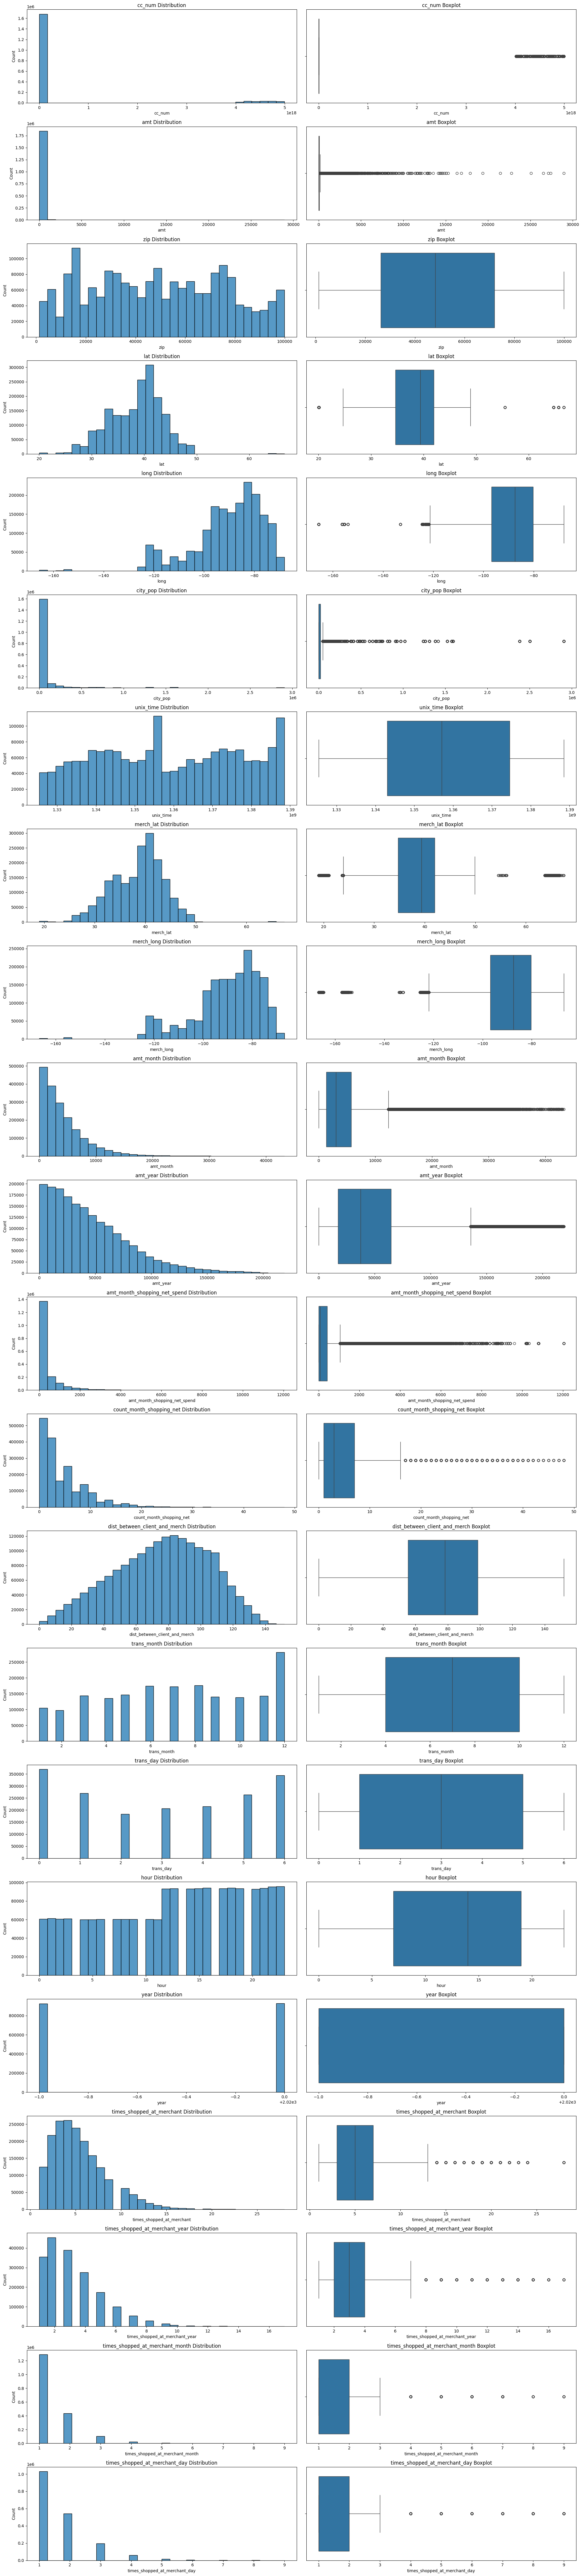

In [ ]:
# Creamos una variable histograma y boxplot para cada variable numérica
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(20, len(numeric_columns) * 4))

for index, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, ax=axes[index, 0])
    axes[index, 0].set_title(f'{col} Distribution')
    axes[index, 0].set_xlabel(col)
    
    sns.boxplot(x=df[col], ax=axes[index, 1])
    axes[index, 1].set_title(f'{col} Boxplot')
    axes[index, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

Al observar las distribuciones de las variables numéricas, podemos ver que existen diferentes grupos con comportamientos similares.
- Grupo de variables con una distribución sesgada hacia la derecha, que también contienen una gran presencia de outliers. Dentro de este grupo podemos ver variables como: zip, city_zip, past_month, amt_month_spent, year, times_shopped_at_merchant.
- Grupo de variables con múltiples grupos presentes en diferentes valores, mostrando también la presencia de picos en distintos puntos. Dentro de este grupo podemos ver variables como: amt_between_month, trans_day.
- Grupo de variables con distribución menos sesgada, mostrando casi una distribución uniforme y con una dispersión moderada. Dentro de este grupo podemover ver variables como: dist_between_client_and_merch y lat.

Column merchant has 693 unique values. Showing top 30.


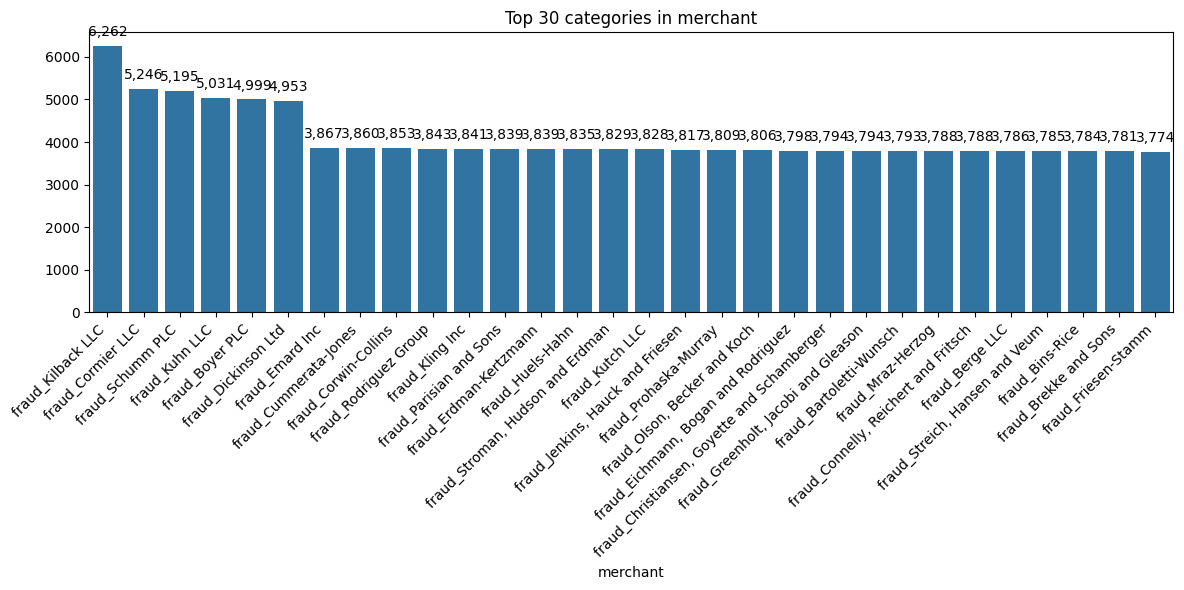

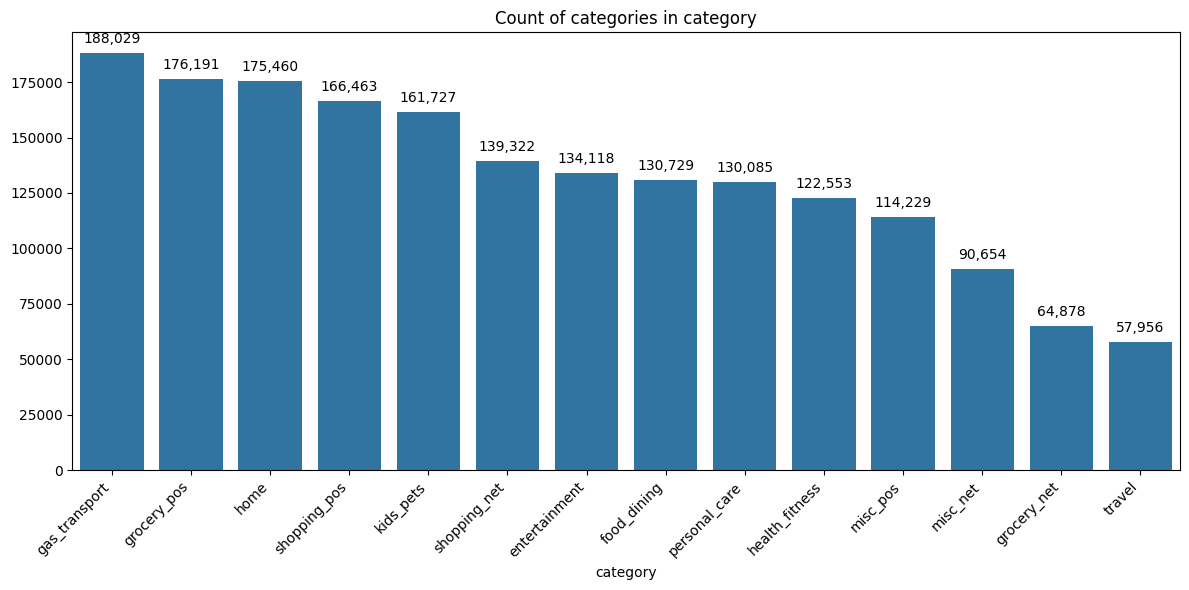

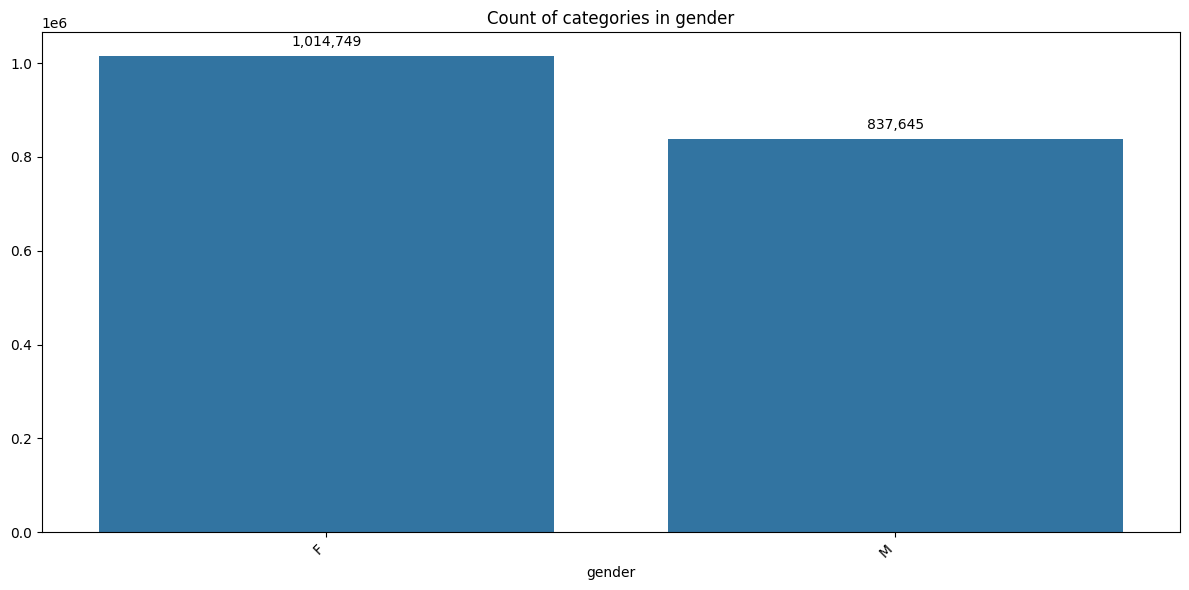

Column city has 906 unique values. Showing top 30.


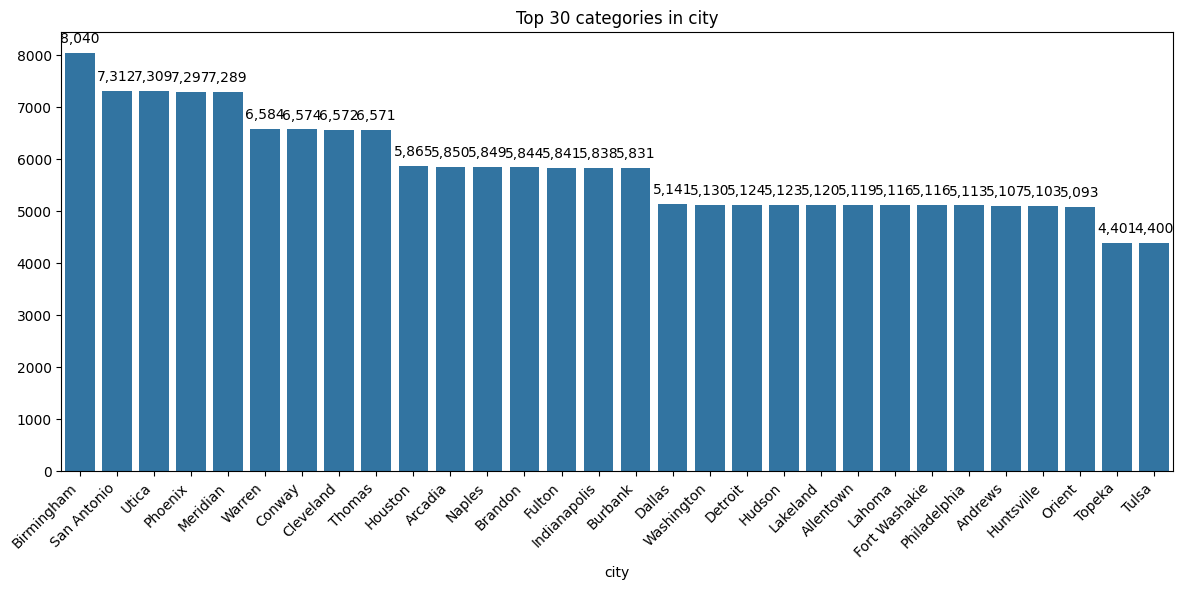

Column state has 51 unique values. Showing top 30.


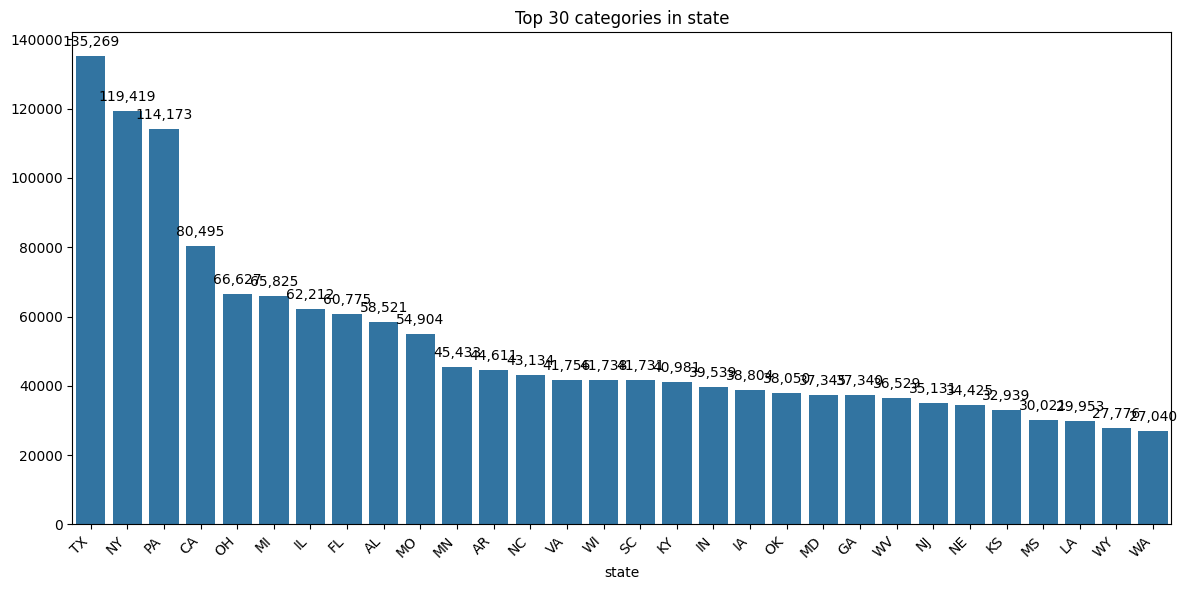

Column job has 497 unique values. Showing top 30.


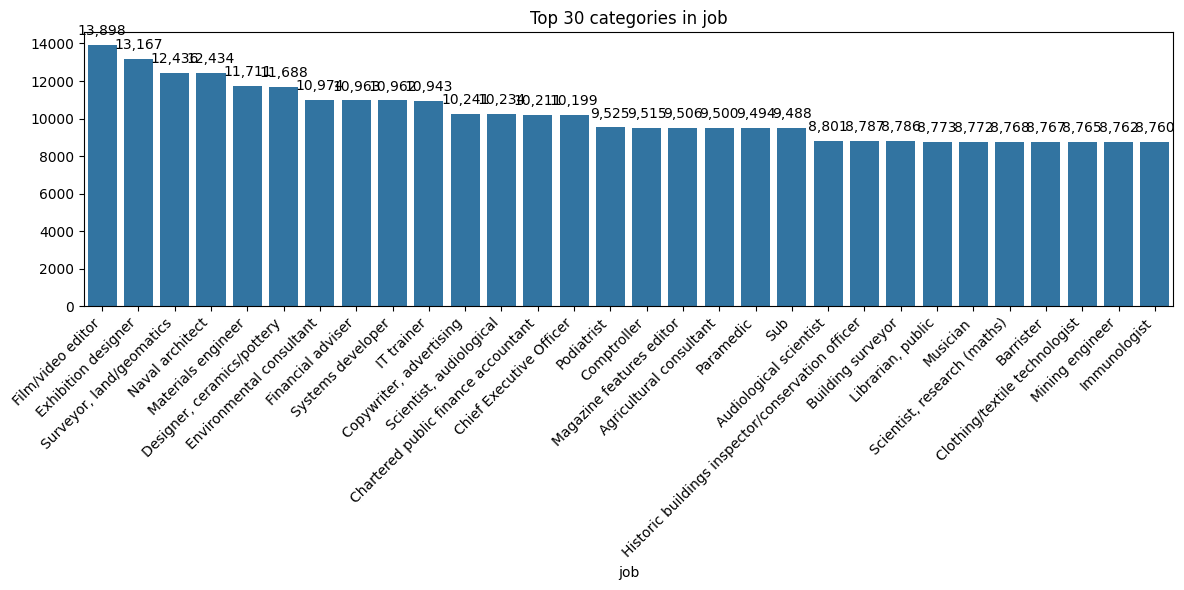

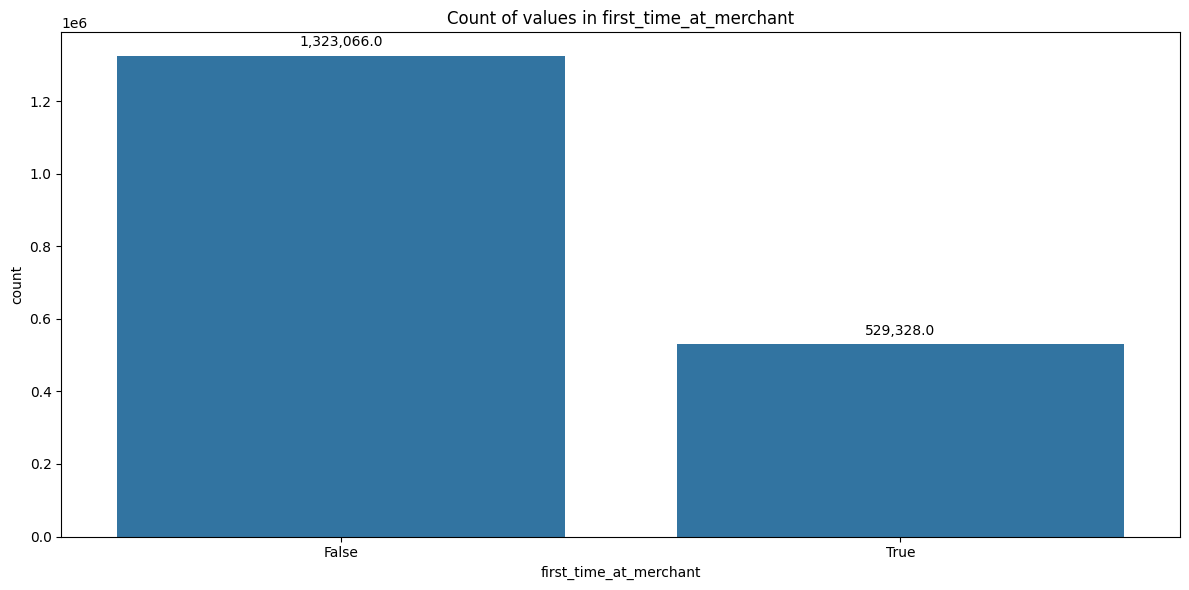

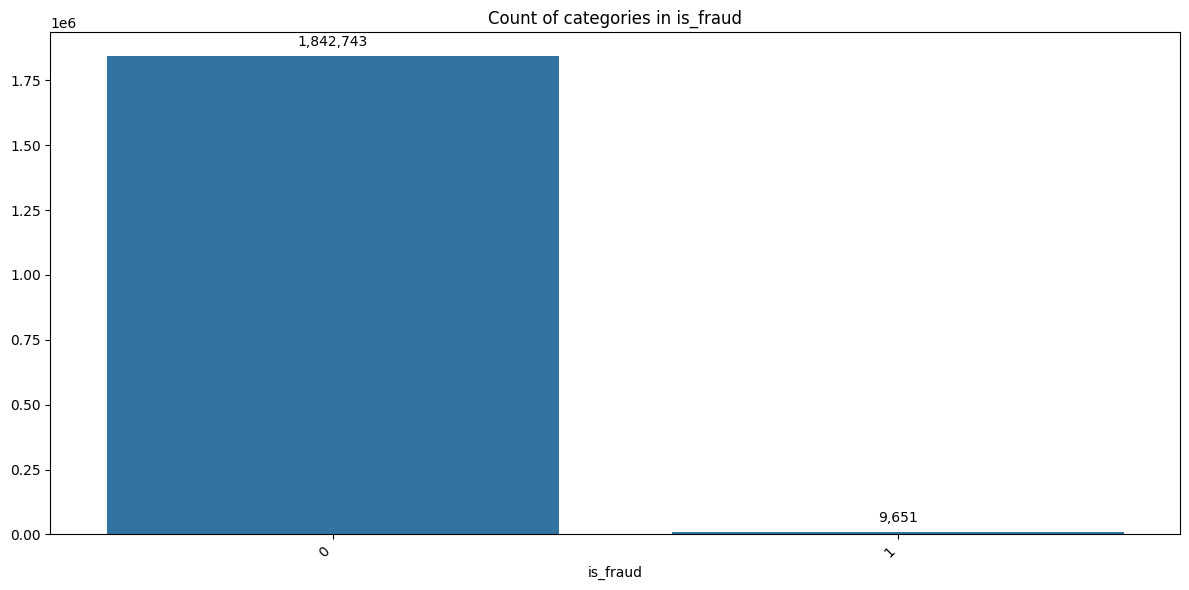

In [ ]:
# Creamos un gráfico para visualizar la distribución de las variables categóricas
for index, col in enumerate(categorical_columns):
    # Evitamos graficar las columnas que tienen valores que son en su mayoría entradas diferentes, como nombre, apellido, etc.
    if col in ['first', 'last', 'street', 'trans_num', 'dob']:
        continue
    
    # Creamos un countplot para cada variable categórica
    plt.figure(figsize=(12, 6))
    
    # Verificamos si la columna es booleana o categórica
    if df[col].dtype == 'bool':
        # Para columnas booleanas, usamos countplot
        ax = sns.countplot(x=df[col])
        plt.title(f'Conteo de valores en {col}')
        
        # Agregamos el conteo encima de cada barra
        for p in ax.patches:
            ax.annotate(f'{p.get_height():,}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'bottom',
                        xytext = (0, 5), textcoords = 'offset points')
    
    # Para columnas categóricas, verificamos el número de valores únicos y si es menor que 30
    elif len(df[col].unique()) < 30:
        # Para columnas categóricas con menos de 30 valores únicos, usamos value_counts y 
        # los ordenamos en orden descendente
        value_counts = df[col].value_counts().sort_values(ascending=False)
        # Graficamos los conteos de valores
        ax = sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Conteo de categorías en {col}')
        plt.xticks(rotation=45, ha='right')
        
        # Agregamos el conteo encima de cada barra
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height()):,}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'bottom',
                        xytext = (0, 5), textcoords = 'offset points')
            
    # Si la columna tiene más de 30 valores únicos, mostramos solo los 30 principales
    else:
        # Agregamos una nota informando al usuario que esta columna tiene más de 30 valores únicos
        # y mostraremos solo los 30 principales
        print(f"La columna {col} tiene {len(df[col].unique())} valores únicos. Mostrando los 30 principales.")
        value_counts = df[col].value_counts().nlargest(30)

        # Graficamos los conteos de valores en un barplot
        ax = sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Top 30 categorías en {col}')
        plt.xticks(rotation=45, ha='right')
        
        # Agregamos el conteo encima de cada barra
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height()):,}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'bottom',
                        xytext = (0, 5), textcoords = 'offset points')
    
    plt.tight_layout()
    plt.show()

Al observar las variables categóricas, se puede ver que existen variables con más de 30 clasificaciones, mientras existen otras que solo cuentas con 2 clasificaciones. Dentro de las variables con muchas clasificaciones, podemos ver que en la mayoría de variables se encuentran dentro de un rango bastante, corto, con excepciones que van hasta más del doble de diferencia comparado con la media. 

Al observar nuestra variable clasificadora de fraude, se puede ver que se encuentra `desbalanceado`, apreciándose una diferencia significativa en la cantidad entre las entradas fraudulentas y las no fraudulentas. Esto provocará que el entrenamiento al modelo sobre las transacciones fraudulentas se vuelva más difícil, por la falta de ejemplos de los mismos.